In [1]:
name = 'Adit Gupta'
netid = 'ag2594'
resources_used = "https://plotly.com/python/bubble-maps/"
people_worked_with = "N/A"
collaboration_on_github = "Answered question, and raised question in issue 1: fixing fips"
print(name)
print(netid)

In [2]:
import csv
import pandas as pd

## Creating Table with Cases per County and Table with Deaths per County

## NOTE: New York City was fixed by changing the fips at that index to '36061'

In [3]:

all_county_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
all_county_data.at[85807, 'fips'] = '36061' #fixes fips for NYC
all_county_data = all_county_data.dropna()
all_county_data.head() #most recent counts in each county (as of april 24th)

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [4]:
#cases per county on each date collected in the nyt database
cases_per_county = all_county_data.drop(columns = ['deaths'])
cases_per_county.head()

date     county       state     fips  cases
0  2020-01-21  Snohomish  Washington  53061.0      1
1  2020-01-22  Snohomish  Washington  53061.0      1
2  2020-01-23  Snohomish  Washington  53061.0      1
3  2020-01-24       Cook    Illinois  17031.0      1
4  2020-01-24  Snohomish  Washington  53061.0      1

In [5]:
#deaths per county on each date collected in the nyt database
deaths_per_county = all_county_data.drop(columns = 'cases')
deaths_per_county.head()

date     county       state     fips  deaths
0  2020-01-21  Snohomish  Washington  53061.0       0
1  2020-01-22  Snohomish  Washington  53061.0       0
2  2020-01-23  Snohomish  Washington  53061.0       0
3  2020-01-24       Cook    Illinois  17031.0       0
4  2020-01-24  Snohomish  Washington  53061.0       0

## Plotting Cases per County in CT

In [6]:
cases_county_data_24_ct = cases_per_county.loc[cases_per_county['date'] == '2020-04-24']
cases_per_county_in_ct = cases_county_data_24_ct.loc[cases_county_data_24_ct['state'] == 'Connecticut']
cases_per_county_in_ct


date      county        state    fips  cases
84421  2020-04-24   Fairfield  Connecticut  9001.0  10227
84422  2020-04-24    Hartford  Connecticut  9003.0   4570
84423  2020-04-24  Litchfield  Connecticut  9005.0    808
84424  2020-04-24   Middlesex  Connecticut  9007.0    561
84425  2020-04-24   New Haven  Connecticut  9009.0   6286
84426  2020-04-24  New London  Connecticut  9011.0    448
84427  2020-04-24     Tolland  Connecticut  9013.0    375
84429  2020-04-24     Windham  Connecticut  9015.0    139

In [7]:
ct_graph = cases_per_county_in_ct.plot.bar(x='county', y='cases', rot=90, title = 'Cases per County in CT')
ct_graph

## Cases and Deaths per County on April 10th


In [8]:
all_county_data_10 = all_county_data.loc[all_county_data['date'] == '2020-04-10']
county_and_lat_long_10 = pd.read_csv('Geocodes_USA_with_Counties.csv')
county_and_lat_long_10 = county_and_lat_long_10.drop(columns = ['zip', 'primary_city', 'state', 'type', 'world_region', 'country', 'decommissioned', 'estimated_population', 'notes']).dropna()
county_and_lat_long_10 = county_and_lat_long_10.drop_duplicates(subset = 'county')
county_data_with_lat_long_and_cases_10 = pd.merge(all_county_data_10, county_and_lat_long_10)
#text column will have something to put in text box of plotted data 
county_data_with_lat_long_and_cases_10['text'] = county_data_with_lat_long_and_cases_10['county'] + ' has ' +(county_data_with_lat_long_and_cases_10['cases']).astype(str)+' cases'
county_data_with_lat_long_and_cases_10['text2'] = county_data_with_lat_long_and_cases_10['county'] + ' has ' +(county_data_with_lat_long_and_cases_10['deaths']).astype(str)+' deaths'

county_data_with_lat_long_and_cases_10.head()

date   county          state     fips  cases  deaths  latitude  \
0  2020-04-10  Autauga        Alabama   1001.0     17       1     32.43   
1  2020-04-10  Baldwin        Alabama   1003.0     59       1     32.99   
2  2020-04-10  Baldwin        Georgia  13009.0     35       1     32.99   
3  2020-04-10  Barbour        Alabama   1005.0      9       0     39.06   
4  2020-04-10  Barbour  West Virginia  54001.0      5       0     39.06   

   longitude                  text                 text2  
0     -86.65  Autauga has 17 cases  Autauga has 1 deaths  
1     -83.29  Baldwin has 59 cases  Baldwin has 1 deaths  
2     -83.29  Baldwin has 35 cases  Baldwin has 1 deaths  
3     -80.11   Barbour has 9 cases  Barbour has 0 deaths  
4     -80.11   Barbour has 5 cases  Barbour has 0 deaths

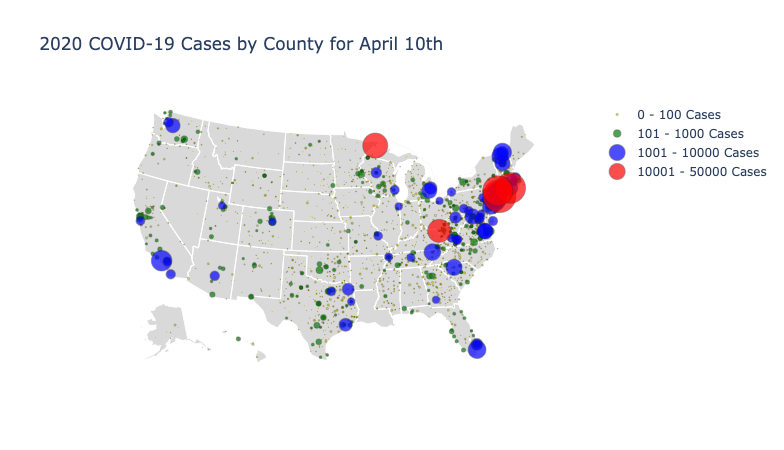

In [9]:
import plotly.graph_objects as go
limits = [(0,100),(101,1000),(1001,10000),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 40
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub_10 = county_data_with_lat_long_and_cases_10[county_data_with_lat_long_and_cases_10['cases'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub_10['longitude'],
        lat = df_sub_10['latitude'],
        text = df_sub_10['text'], #text has what to include in text box
        marker = dict(
            size = df_sub_10['cases']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Cases'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Cases by County for April 10th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

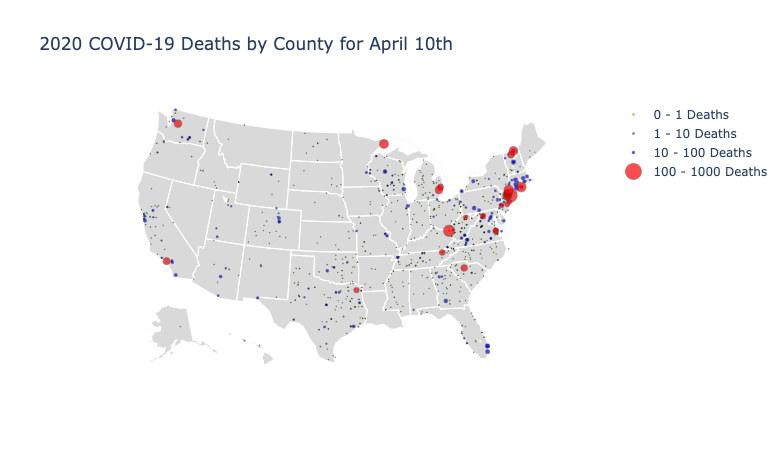

In [10]:
limits = [(0,1),(1,10),(10,100),(100,1000),(1000,10000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 10
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub_10 = county_data_with_lat_long_and_cases_10[county_data_with_lat_long_and_cases_10['deaths'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub_10['longitude'],
        lat = df_sub_10['latitude'],
        text = df_sub_10['text2'], #text has what to include in text box
        marker = dict(
            size = df_sub_10['deaths']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Deaths'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Deaths by County for April 10th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

## Cases and Deaths for April 24th 

In [11]:
#these are not normalized 
all_county_data_24 = all_county_data.loc[all_county_data['date'] == '2020-04-24']
county_and_lat_long = pd.read_csv('Geocodes_USA_with_Counties.csv')
county_and_lat_long = county_and_lat_long.drop(columns = ['zip', 'primary_city', 'state', 'type', 'world_region', 'country', 'decommissioned', 'estimated_population', 'notes']).dropna()
county_and_lat_long = county_and_lat_long.drop_duplicates(subset = 'county')
county_data_with_lat_long_and_cases = pd.merge(all_county_data_24, county_and_lat_long)
#text column will have something to put in text box of plotted data 
county_data_with_lat_long_and_cases['text'] = county_data_with_lat_long_and_cases['county'] + ' has ' +(county_data_with_lat_long_and_cases['cases']).astype(str)+' cases'
county_data_with_lat_long_and_cases['text2'] = county_data_with_lat_long_and_cases['county'] + ' has ' +(county_data_with_lat_long_and_cases['deaths']).astype(str)+' deaths'
county_data_with_lat_long_and_cases.head()

date   county          state     fips  cases  deaths  latitude  \
0  2020-04-24  Autauga        Alabama   1001.0     36       2     32.43   
1  2020-04-24  Baldwin        Alabama   1003.0    147       3     32.99   
2  2020-04-24  Baldwin        Georgia  13009.0    169       5     32.99   
3  2020-04-24  Barbour        Alabama   1005.0     32       0     39.06   
4  2020-04-24  Barbour  West Virginia  54001.0      4       1     39.06   

   longitude                   text                 text2  
0     -86.65   Autauga has 36 cases  Autauga has 2 deaths  
1     -83.29  Baldwin has 147 cases  Baldwin has 3 deaths  
2     -83.29  Baldwin has 169 cases  Baldwin has 5 deaths  
3     -80.11   Barbour has 32 cases  Barbour has 0 deaths  
4     -80.11    Barbour has 4 cases  Barbour has 1 deaths

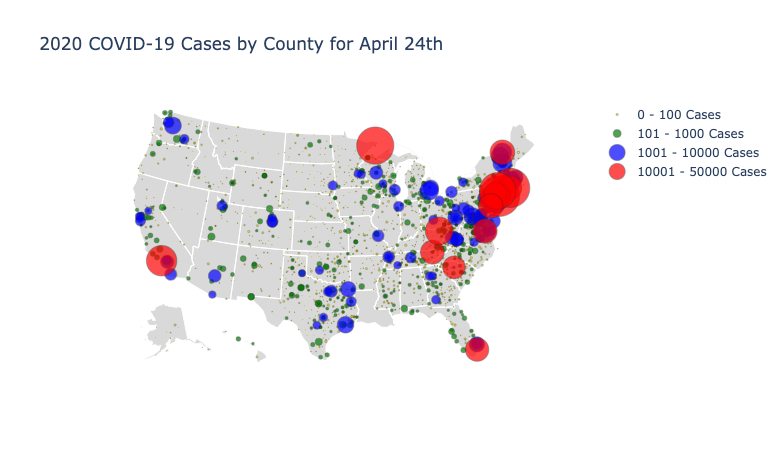

In [12]:
import plotly.graph_objects as go
limits = [(0,100),(101,1000),(1001,10000),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 40
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_lat_long_and_cases[county_data_with_lat_long_and_cases['cases'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'], #text has what to include in text box
        marker = dict(
            size = df_sub['cases']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Cases'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Cases by County for April 24th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

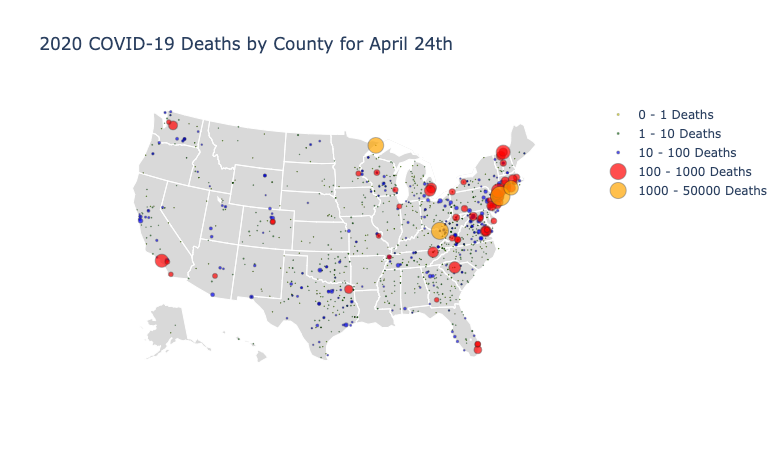

In [13]:
limits = [(0,1),(1,10),(10,100),(100,1000),(1000,50000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 10
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_lat_long_and_cases[county_data_with_lat_long_and_cases['deaths'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text2'], #text has what to include in text box
        marker = dict(
            size = df_sub['deaths']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Deaths'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Deaths by County for April 24th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

# Normalized Data

## NOTE: New York City was already corrected (fips) previously

## Normalized Cases and Deaths on April 10th

In [14]:
county_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv', encoding='latin1')
#county_pop = county_pop.drop_duplicates(subset = 'county')
#county_pop = county_pop[county_pop.estimated_population != 0]
county_pop = county_pop[['CTYNAME', 'POPESTIMATE2019']]
new = county_pop["CTYNAME"].str.split(" ", n = 1, expand = True) 
county_pop["county"]= new[0] 
county_pop = county_pop.drop(columns = ['CTYNAME']).drop_duplicates(subset = 'county')
county_pop_lat_long = pd.merge(county_pop, county_and_lat_long)


In [15]:
county_data_with_pop_lat_long_10 = pd.merge(all_county_data_10, county_pop_lat_long)
#text column will have something to put in text box of plotted data 
county_data_with_pop_lat_long_10['text'] = county_data_with_pop_lat_long_10['county'] + ' has ' +((county_data_with_pop_lat_long_10['cases'])/(county_data_with_pop_lat_long_10['POPESTIMATE2019'])).astype(str)+' cases/pop'
county_data_with_pop_lat_long_10['ratio'] = (county_data_with_pop_lat_long_10['cases'])/(county_data_with_pop_lat_long_10['POPESTIMATE2019'])
county_data_with_pop_lat_long_10['text2'] = county_data_with_pop_lat_long_10['county'] + ' has ' +((county_data_with_pop_lat_long_10['deaths'])/(county_data_with_pop_lat_long_10['POPESTIMATE2019'])).astype(str)+' deaths/pop'
county_data_with_pop_lat_long_10['ratio2'] = (county_data_with_pop_lat_long_10['deaths'])/(county_data_with_pop_lat_long_10['POPESTIMATE2019'])
county_data_with_pop_lat_long_10.head()


date   county          state     fips  cases  deaths  \
0  2020-04-10  Autauga        Alabama   1001.0     17       1   
1  2020-04-10  Baldwin        Alabama   1003.0     59       1   
2  2020-04-10  Baldwin        Georgia  13009.0     35       1   
3  2020-04-10  Barbour        Alabama   1005.0      9       0   
4  2020-04-10  Barbour  West Virginia  54001.0      5       0   

   POPESTIMATE2019  latitude  longitude  \
0            55869     32.43     -86.65   
1           223234     32.99     -83.29   
2           223234     32.99     -83.29   
3            24686     39.06     -80.11   
4            24686     39.06     -80.11   

                                           text     ratio  \
0  Autauga has 0.00030428323399380694 cases/pop  0.000304   
1  Baldwin has 0.00026429665731922554 cases/pop  0.000264   
2  Baldwin has 0.00015678615264699822 cases/pop  0.000157   
3   Barbour has 0.0003645791136676659 cases/pop  0.000365   
4  Barbour has 0.00020254395203759217 cases/pop  0.000203   

                                           text2    ratio2  
0  Autauga has 1.7899013764341584e-05 deaths/pop  0.000018  
1   Baldwin has 4.479604361342806e-06 deaths/pop  0.000004  
2   Baldwin has 4.479604361342806e-06 deaths/pop  0.000004  
3                     Barbour has 0.0 deaths/pop  0.000000  
4                     Barbour has 0.0 deaths/pop  0.000000

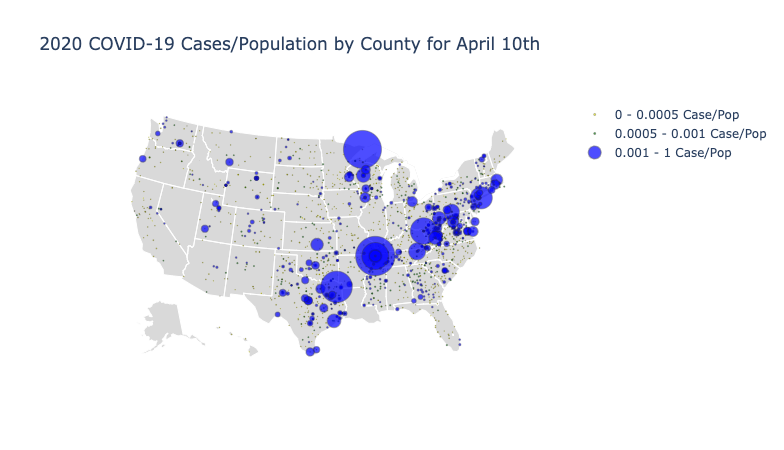

In [16]:
limits = [(0,0.0005),(0.0005,0.001),(.001,1),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 1000
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_pop_lat_long_10[county_data_with_pop_lat_long_10['ratio'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'], #text has what to include in text box
        marker = dict(
            size = df_sub['ratio']*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Case/Pop'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Cases/Population by County for April 10th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

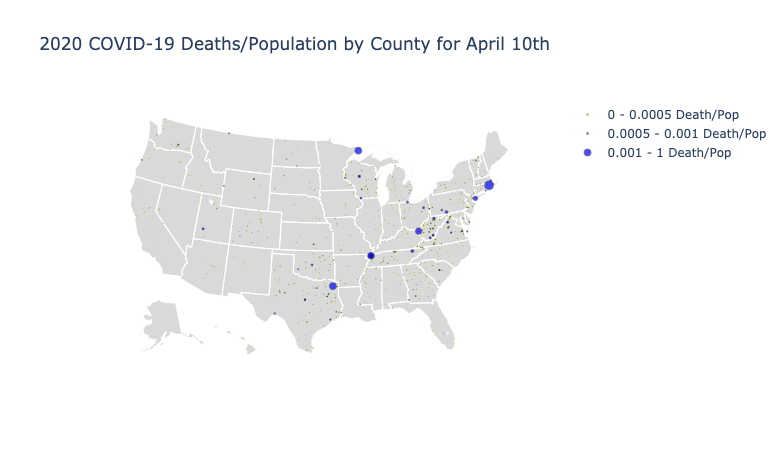

In [17]:
limits = [(0,0.0005),(0.0005,0.001),(.001,1),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 1000
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_pop_lat_long_10[county_data_with_pop_lat_long_10['ratio2'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text2'], #text has what to include in text box
        marker = dict(
            size = df_sub['ratio2']*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Death/Pop'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Deaths/Population by County for April 10th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

## Normalized Cases and Deaths on April 24th

In [18]:
county_data_with_pop_lat_long_24 = pd.merge(all_county_data_24, county_pop_lat_long)
#text column will have something to put in text box of plotted data 
county_data_with_pop_lat_long_24['text'] = county_data_with_pop_lat_long_24['county'] + ' has ' +((county_data_with_pop_lat_long_24['cases'])/(county_data_with_pop_lat_long_24['POPESTIMATE2019'])).astype(str)+' cases/pop'
county_data_with_pop_lat_long_24['ratio'] = (county_data_with_pop_lat_long_24['cases'])/(county_data_with_pop_lat_long_24['POPESTIMATE2019'])
county_data_with_pop_lat_long_24['text2'] = county_data_with_pop_lat_long_24['county'] + ' has ' +((county_data_with_pop_lat_long_24['deaths'])/(county_data_with_pop_lat_long_24['POPESTIMATE2019'])).astype(str)+' deaths/pop'
county_data_with_pop_lat_long_24['ratio2'] = (county_data_with_pop_lat_long_24['deaths'])/(county_data_with_pop_lat_long_24['POPESTIMATE2019'])
county_data_with_pop_lat_long_24.head()

date   county          state     fips  cases  deaths  \
0  2020-04-24  Autauga        Alabama   1001.0     36       2   
1  2020-04-24  Baldwin        Alabama   1003.0    147       3   
2  2020-04-24  Baldwin        Georgia  13009.0    169       5   
3  2020-04-24  Barbour        Alabama   1005.0     32       0   
4  2020-04-24  Barbour  West Virginia  54001.0      4       1   

   POPESTIMATE2019  latitude  longitude  \
0            55869     32.43     -86.65   
1           223234     32.99     -83.29   
2           223234     32.99     -83.29   
3            24686     39.06     -80.11   
4            24686     39.06     -80.11   

                                           text     ratio  \
0   Autauga has 0.0006443644955162971 cases/pop  0.000644   
1   Baldwin has 0.0006585018411173926 cases/pop  0.000659   
2   Baldwin has 0.0007570531370669342 cases/pop  0.000757   
3   Barbour has 0.0012962812930405899 cases/pop  0.001296   
4  Barbour has 0.00016203516163007373 cases/pop  0.000162   

                                           text2    ratio2  
0   Autauga has 3.579802752868317e-05 deaths/pop  0.000036  
1   Baldwin has 1.343881308402842e-05 deaths/pop  0.000013  
2  Baldwin has 2.2398021806714032e-05 deaths/pop  0.000022  
3                     Barbour has 0.0 deaths/pop  0.000000  
4  Barbour has 4.0508790407518434e-05 deaths/pop  0.000041

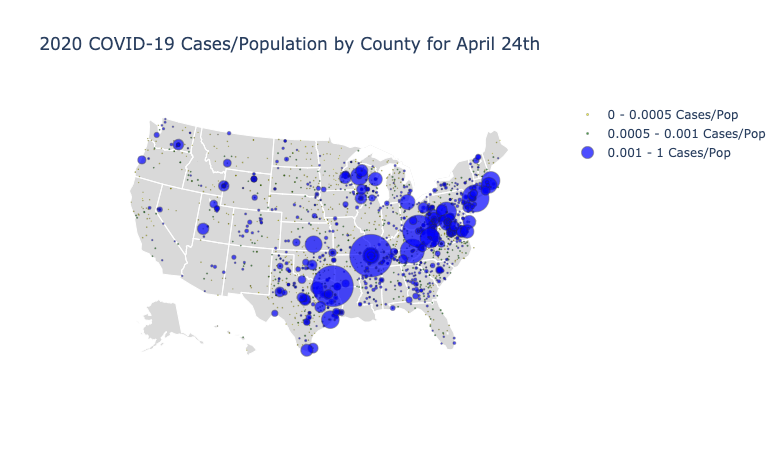

In [19]:
limits = [(0,0.0005),(0.0005,0.001),(.001,1),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 1000
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_pop_lat_long_24[county_data_with_pop_lat_long_24['ratio'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'], #text has what to include in text box
        marker = dict(
            size = df_sub['ratio']*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Cases/Pop'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Cases/Population by County for April 24th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()

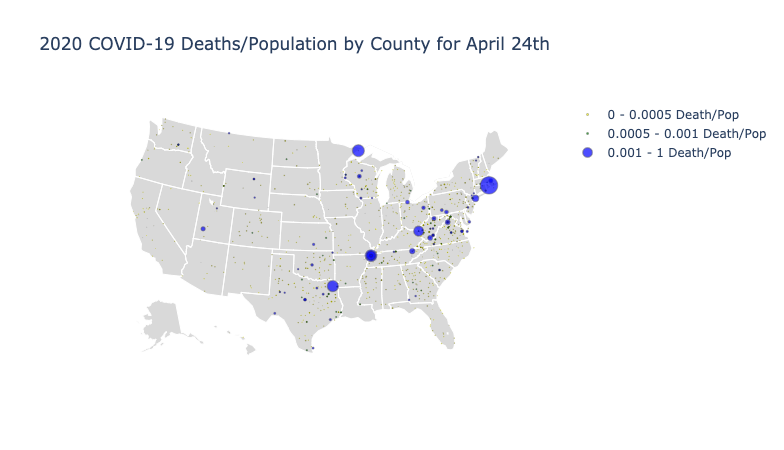

In [20]:
limits = [(0,0.0005),(0.0005,0.001),(.001,1),(10001,50000),(50001,100000000)]
colors = ["yellow","green","blue","red","orange"]
counties = []
scale = 1000
fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    #filter color based on number of cases in county
    df_sub = county_data_with_pop_lat_long_24[county_data_with_pop_lat_long_24['ratio2'].between(lim[0], lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text2'], #text has what to include in text box
        marker = dict(
            size = df_sub['ratio2']*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1} Death/Pop'.format(lim[0],lim[1])))
     
fig.update_layout(
    title_text = '2020 COVID-19 Deaths/Population by County for April 24th',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)')
)   


fig.show()